In [ ]:
#!pip install pyarrow

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading the data

In [4]:
data=pd.read_parquet(r'C:\Users\91882\Downloads\train.parquet',engine='pyarrow')

In [5]:
data.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [6]:
data.shape

(3220868, 3)

In [7]:
data.tail(20)

,Patient-Uid,Date,Incident
29080089,a0ee1b1f-1c7c-11ec-9123-16262ee38c7f,2016-02-05,DRUG_TYPE_0
29080097,a0ee114f-1c7c-11ec-b482-16262ee38c7f,2019-07-04,DRUG_TYPE_10
29080151,a0eef180-1c7c-11ec-8de8-16262ee38c7f,2016-11-16,DRUG_TYPE_1
29080161,a0ee18dd-1c7c-11ec-bdd6-16262ee38c7f,2020-08-29,DRUG_TYPE_10
29080166,a0ee9dc8-1c7c-11ec-8542-16262ee38c7f,2019-12-17,DRUG_TYPE_1
29080178,a0eef180-1c7c-11ec-8de8-16262ee38c7f,2018-07-17,TARGET DRUG
29080183,a0ee114f-1c7c-11ec-b482-16262ee38c7f,2017-05-02,DRUG_TYPE_2
29080246,a0ee17c0-1c7c-11ec-a2bc-16262ee38c7f,2019-10-03,DRUG_TYPE_0
29080371,a0ee1343-1c7c-11ec-92d6-16262ee38c7f,2015-08-06,DRUG_TYPE_6
29080425,a0eef3f2-1c7c-11ec-a63f-16262ee38c7f,2018-05-18,DRUG_TYPE_7


In [8]:
data['Incident'] = data['Incident'].replace('TARGET DRUG', 'TARGET_DRUG')

# Let's see how many patients are there

In [9]:
len(data['Patient-Uid'].unique())

27033

# Let's see How many types of drug are using

In [10]:
len(data['Incident'].unique())

57

# Grouping

In [11]:
data.sort_values(by=['Patient-Uid', 'Date'], inplace=True)

In [12]:
df_group = data.groupby('Patient-Uid')['Incident'].apply(lambda x: ' '.join(x)).reset_index()

In [13]:
df_group['Incident'][0]

'DRUG_TYPE_7 SYMPTOM_TYPE_2 DRUG_TYPE_7 SYMPTOM_TYPE_0 DRUG_TYPE_9 DRUG_TYPE_0 TEST_TYPE_0 DRUG_TYPE_11 DRUG_TYPE_7 DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_7 TEST_TYPE_0 DRUG_TYPE_2 DRUG_TYPE_0 DRUG_TYPE_2 DRUG_TYPE_0 TEST_TYPE_0 PRIMARY_DIAGNOSIS TEST_TYPE_1 TEST_TYPE_0 DRUG_TYPE_2 SYMPTOM_TYPE_0 DRUG_TYPE_0 PRIMARY_DIAGNOSIS TEST_TYPE_0 DRUG_TYPE_2 PRIMARY_DIAGNOSIS DRUG_TYPE_0 PRIMARY_DIAGNOSIS DRUG_TYPE_8 DRUG_TYPE_0 DRUG_TYPE_0 PRIMARY_DIAGNOSIS SYMPTOM_TYPE_0 PRIMARY_DIAGNOSIS PRIMARY_DIAGNOSIS SYMPTOM_TYPE_2 DRUG_TYPE_0 DRUG_TYPE_2 DRUG_TYPE_6 SYMPTOM_TYPE_7 PRIMARY_DIAGNOSIS DRUG_TYPE_0 DRUG_TYPE_8 DRUG_TYPE_6 DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_6 DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_6 DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_6 DRUG_TYPE_0 DRUG_TYPE_0 PRIMARY_DIAGNOSIS DRUG_TYPE_2 TEST_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_6 DRUG_TYPE_0 SYMPTOM_TYPE_0 PRIMARY_DIAGNOSIS DRUG_TYPE_2 DRUG_TYPE_0 PRIMARY_DIAGNOSIS TEST_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_6 DRUG_TYPE_0 DRUG_TYPE_6 DRUG_TYPE_0 TEST_TYPE_0 PRIMARY_DIA

In [14]:
df_group

,Patient-Uid,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,DRUG_TYPE_7 SYMPTOM_TYPE_2 DRUG_TYPE_7 SYMPTOM...
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_2 DRUG_TYPE_0 PRIMARY_DI...
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,DRUG_TYPE_0 PRIMARY_DIAGNOSIS DRUG_TYPE_7 DRUG...
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_7 DRUG_TYPE_2 PRIMARY_DI...
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,DRUG_TYPE_1 TEST_TYPE_1 SYMPTOM_TYPE_8 DRUG_TY...
...,...,...
27028,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,DRUG_TYPE_6 DRUG_TYPE_0 DRUG_TYPE_6 DRUG_TYPE_...
27029,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,DRUG_TYPE_6 DRUG_TYPE_8 DRUG_TYPE_1 DRUG_TYPE_...
27030,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,DRUG_TYPE_6 DRUG_TYPE_1 DRUG_TYPE_9 DRUG_TYPE_...
27031,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,DRUG_TYPE_9 SYMPTOM_TYPE_7 DRUG_TYPE_2 DRUG_TY...


# Positive-set and Negative-set

In [15]:
df_group['classes'] = df_group['Incident'].apply(lambda x: 1 if 'TARGET_DRUG' in x.split() else 0)

In [16]:
df_group

,Patient-Uid,Incident,classes
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,DRUG_TYPE_7 SYMPTOM_TYPE_2 DRUG_TYPE_7 SYMPTOM...,0
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_2 DRUG_TYPE_0 PRIMARY_DI...,0
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,DRUG_TYPE_0 PRIMARY_DIAGNOSIS DRUG_TYPE_7 DRUG...,0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_7 DRUG_TYPE_2 PRIMARY_DI...,0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,DRUG_TYPE_1 TEST_TYPE_1 SYMPTOM_TYPE_8 DRUG_TY...,0
...,...,...,...
27028,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,DRUG_TYPE_6 DRUG_TYPE_0 DRUG_TYPE_6 DRUG_TYPE_...,1
27029,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,DRUG_TYPE_6 DRUG_TYPE_8 DRUG_TYPE_1 DRUG_TYPE_...,1
27030,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,DRUG_TYPE_6 DRUG_TYPE_1 DRUG_TYPE_9 DRUG_TYPE_...,1
27031,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,DRUG_TYPE_9 SYMPTOM_TYPE_7 DRUG_TYPE_2 DRUG_TY...,1


# Drop-off Rate Analysis

# Problem 2

Drugs are generally administered/prescribed by the physicians for a certain
period of time or they are administered at regular intervals, but for various reasons patients
might stop taking the treatment .

Consider following example for better understanding
Let’s say you get a throat infection, the physician prescribes you an antibiotic for 10 days,
but you stop taking the treatment after 3 days because of some adverse events.

In the above example ideal treatment duration is 10 days but patients stopped taking
treatment after 3 days due to adverse events. Patients stopping a treatment is called dropoff.
We want to study dropoff for “Target Drug”, the aim is to generate insights on what events
lead to patients stopping on “Target Drug”.

Assume ideal treatment duration for “Target Drug” is 1 year, come up with analysis showing
how drop-off rate is, dropoff rate is defined as number of patients dropping off each month.
Then come up with analysis to generate insights on what events are driving a patient to stop
taking “Target Drug”.

### Step-1

#### Filtering the required data i.e patients who have taken ‘TARGET_DRUG’ 

In [17]:
target_drug_df = df_group[df_group['Incident'].str.contains('TARGET_DRUG')]

### Step-2

In [18]:
#Making a list all the incident dates for each patient and add it to the dataset.
patient_dates=[]

for patient_id in tqdm(list(target_drug_df['Patient-Uid'].values)):
    patient_data =data[data['Patient-Uid']==patient_id]['Date'].values
    patient_dates.append(patient_data)

target_drug_df['Date_sequence']=patient_dates

100%|████████████████████████████████████████████████████████████████████████████| 9374/9374 [1:19:58<00:00,  1.95it/s]


### Step-3

In [19]:
target_drug_dates=[]
for j in tqdm(range(target_drug_df.shape[0])):
    patient_dates_drug_used=[]
    for i, incident in enumerate(target_drug_df.iloc[j]['Incident'].split()):
        if incident=="TARGET_DRUG":
            patient_dates_drug_used.append(target_drug_df.iloc[j]['Date_sequence'][i])
    
    target_drug_dates.append(patient_dates_drug_used)

100%|████████████████████████████████████████████████████████████████████████████| 9374/9374 [00:08<00:00, 1134.42it/s]


In [20]:
target_drug_dates

[[numpy.datetime64('2020-07-08T00:00:00.000000000'),
  numpy.datetime64('2020-08-05T00:00:00.000000000'),
  numpy.datetime64('2020-09-02T00:00:00.000000000')],
 [numpy.datetime64('2018-04-24T00:00:00.000000000'),
  numpy.datetime64('2018-05-17T00:00:00.000000000'),
  numpy.datetime64('2018-06-13T00:00:00.000000000'),
  numpy.datetime64('2018-08-07T00:00:00.000000000'),
  numpy.datetime64('2018-08-09T00:00:00.000000000'),
  numpy.datetime64('2018-12-12T00:00:00.000000000'),
  numpy.datetime64('2019-02-19T00:00:00.000000000'),
  numpy.datetime64('2019-06-04T00:00:00.000000000'),
  numpy.datetime64('2019-07-09T00:00:00.000000000'),
  numpy.datetime64('2019-08-30T00:00:00.000000000'),
  numpy.datetime64('2019-10-29T00:00:00.000000000')],
 [numpy.datetime64('2019-10-31T00:00:00.000000000'),
  numpy.datetime64('2019-12-12T00:00:00.000000000'),
  numpy.datetime64('2020-02-21T00:00:00.000000000'),
  numpy.datetime64('2020-05-26T00:00:00.000000000')],
 [numpy.datetime64('2018-04-05T00:00:00.000

In [24]:
target_drug_df['target_drug_used_dates']=target_drug_dates
target_drug_df.head()

,Patient-Uid,Incident,classes,Date_sequence,target_drug_used_dates
17659,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,DRUG_TYPE_7 TEST_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_...,1,"[2015-04-14T00:00:00.000000000, 2015-09-07T00:...","[2020-07-08T00:00:00.000000000, 2020-08-05T00:..."
17660,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,PRIMARY_DIAGNOSIS DRUG_TYPE_2 DRUG_TYPE_2 PRIM...,1,"[2015-04-16T00:00:00.000000000, 2015-04-23T00:...","[2018-04-24T00:00:00.000000000, 2018-05-17T00:..."
17661,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,DRUG_TYPE_5 DRUG_TYPE_5 DRUG_TYPE_7 SYMPTOM_TY...,1,"[2015-09-16T00:00:00.000000000, 2015-11-13T00:...","[2019-10-31T00:00:00.000000000, 2019-12-12T00:..."
17662,a0e9c414-1c7c-11ec-889a-16262ee38c7f,DRUG_TYPE_9 DRUG_TYPE_7 DRUG_TYPE_7 SYMPTOM_TY...,1,"[2015-05-01T00:00:00.000000000, 2015-05-01T00:...","[2018-04-05T00:00:00.000000000, 2018-06-24T00:..."
17663,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,DRUG_TYPE_8 DRUG_TYPE_7 SYMPTOM_TYPE_0 DRUG_TY...,1,"[2015-04-16T00:00:00.000000000, 2015-09-11T00:...","[2019-09-10T00:00:00.000000000, 2019-10-10T00:..."


# calculating drop-off rates

In [25]:
#storing the number of patients dropping of each month
counts_per_month={}

#We are also collecting the list of patients who stopped using target_drug 
list_of_dropoff_patients=[]

#Loop through the target_drug usage dates of each patient
for i,L in enumerate(tqdm(target_drug_dates)):
    #Now check the difference in dates of first usage and last usage if it is < 365, then it is the case of droppoff
    if int((L[-1]-L[0])/ np.timedelta64(1, 'D')) < 365:
        list_of_dropoff_patients.append(i)
        if np.datetime_as_string(L[0], unit='M') not in counts_per_month:
            counts_per_month[np.datetime_as_string(L[0], unit='M')]=1
        else:
            counts_per_month[np.datetime_as_string(L[0], unit='M')]+=1

100%|███████████████████████████████████████████████████████████████████████████| 9374/9374 [00:00<00:00, 66573.77it/s]


In [26]:
counts_per_month

{'2020-07': 269,
 '2019-10': 325,
 '2019-09': 230,
 '2020-02': 225,
 '2020-06': 258,
 '2018-12': 133,
 '2019-03': 110,
 '2018-08': 167,
 '2019-01': 141,
 '2018-05': 185,
 '2020-04': 293,
 '2019-05': 190,
 '2018-06': 187,
 '2019-02': 107,
 '2018-11': 128,
 '2019-11': 252,
 '2018-10': 142,
 '2018-03': 183,
 '2019-07': 167,
 '2019-12': 279,
 '2019-04': 148,
 '2019-06': 163,
 '2020-01': 254,
 '2020-03': 233,
 '2020-05': 256,
 '2018-09': 131,
 '2017-12': 4,
 '2018-07': 155,
 '2018-04': 215,
 '2017-10': 4,
 '2019-08': 239,
 '2018-01': 5,
 '2018-02': 6,
 '2017-11': 1,
 '2017-08': 2}

In [27]:
#Sort the keys in order, so that we have the x-axis as the timeline
keys_list = sorted(list(counts_per_month.keys()))
#also get the coreesponding values
values_list= [counts_per_month[key] for key in keys_list]

#Plot in the format of a bar graph
df = pd.DataFrame({'Months': keys_list, 'No.of Patients Dropping-off': values_list})

In [28]:
df

,Months,No.of Patients Dropping-off
0,2017-08,2
1,2017-10,4
2,2017-11,1
3,2017-12,4
4,2018-01,5
5,2018-02,6
6,2018-03,183
7,2018-04,215
8,2018-05,185
9,2018-06,187


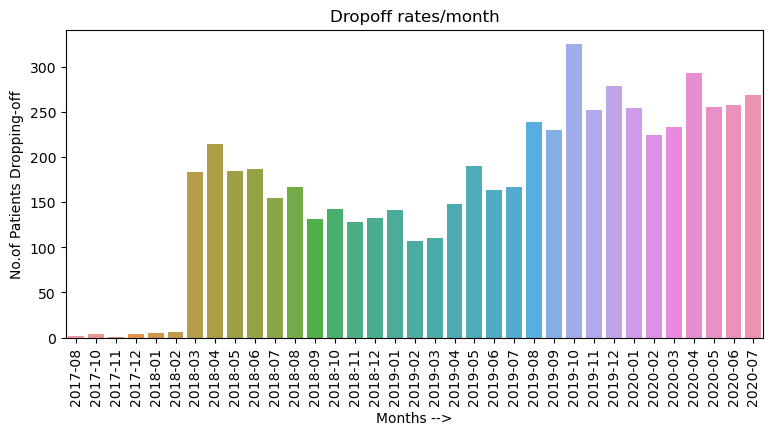

In [30]:
plt.figure(figsize=(9, 4))
sns.barplot(data=df, x='Months', y='No.of Patients Dropping-off')
plt.title("Dropoff rates/month")
plt.xlabel('Months -->')
plt.ylabel('No.of Patients Dropping-off')
plt.xticks(rotation=90)
plt.show()

# Insight on which events are leading to drop-off

In [31]:
list_of_dropoff_patients

[0,
 2,
 4,
 6,
 8,
 9,
 10,
 14,
 15,
 20,
 21,
 22,
 24,
 29,
 30,
 31,
 35,
 36,
 39,
 42,
 43,
 44,
 46,
 47,
 51,
 52,
 55,
 56,
 57,
 58,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 72,
 74,
 75,
 76,
 78,
 79,
 80,
 81,
 83,
 84,
 85,
 87,
 88,
 89,
 90,
 96,
 101,
 106,
 107,
 108,
 112,
 115,
 116,
 119,
 121,
 123,
 126,
 127,
 128,
 129,
 131,
 132,
 136,
 137,
 138,
 139,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 152,
 153,
 155,
 158,
 159,
 160,
 164,
 165,
 169,
 171,
 172,
 173,
 174,
 176,
 177,
 181,
 182,
 185,
 186,
 187,
 188,
 191,
 192,
 194,
 195,
 196,
 197,
 200,
 201,
 202,
 204,
 205,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 219,
 221,
 223,
 227,
 228,
 229,
 231,
 232,
 233,
 234,
 235,
 238,
 241,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 253,
 255,
 256,
 259,
 260,
 261,
 262,
 265,
 266,
 268,
 269,
 272,
 275,
 277,
 278,
 281,
 282,
 283,
 284,
 285,
 287,
 288,
 290,
 291,
 296,
 297,
 301,
 303,
 308,
 309,
 311,
 314,
 315,
 318,
 319,
 32

In [32]:
dic={}
for position in tqdm(list_of_dropoff_patients):
    row=target_drug_df.iloc[position]

    #get all the incidents list of the patient first, then we can go through this list to find the events before dropoff
    all_incidents = row['Incident'].split()
    
    #stores the index of the date where the target_drug was taken last
    stopping_index=0

    #iterate through the dates and check if the last target_drug usage date matches any, if yes then note down its index 
    for i,current_date in enumerate(row['Date_sequence']):
        if current_date == row['target_drug_used_dates'][-1]:
            stopping_index =i
            break
    
    count=0 #keeping track of the number of events noted down before the stoppage
    iter_index=stopping_index-1 #This is for getting the index of those events which lead to stoppage of the target_drug
    

    while count < 3:
        
        if all_incidents[iter_index] != 'TARGET_DRUG':
            
            if all_incidents[iter_index] not in dic:
                dic[all_incidents[iter_index]]=1
            else:
                dic[all_incidents[iter_index]]+=1
            count+=1
        
       
        if iter_index==0:
            break
        else:
            iter_index-=1

100%|█████████████████████████████████████████████████████████████████████████████| 5787/5787 [00:07<00:00, 807.75it/s]


In [33]:
dic

{'PRIMARY_DIAGNOSIS': 4097,
 'DRUG_TYPE_11': 211,
 'DRUG_TYPE_1': 2073,
 'DRUG_TYPE_3': 908,
 'DRUG_TYPE_2': 1583,
 'DRUG_TYPE_7': 1191,
 'DRUG_TYPE_0': 1720,
 'TEST_TYPE_3': 75,
 'SYMPTOM_TYPE_0': 177,
 'DRUG_TYPE_8': 470,
 'DRUG_TYPE_9': 356,
 'DRUG_TYPE_6': 2427,
 'TEST_TYPE_1': 516,
 'SYMPTOM_TYPE_4': 12,
 'SYMPTOM_TYPE_9': 30,
 'DRUG_TYPE_5': 212,
 'DRUG_TYPE_10': 444,
 'SYMPTOM_TYPE_2': 47,
 'DRUG_TYPE_13': 77,
 'SYMPTOM_TYPE_15': 33,
 'TEST_TYPE_2': 45,
 'SYMPTOM_TYPE_17': 10,
 'SYMPTOM_TYPE_29': 20,
 'SYMPTOM_TYPE_10': 23,
 'DRUG_TYPE_15': 50,
 'DRUG_TYPE_14': 91,
 'SYMPTOM_TYPE_6': 92,
 'DRUG_TYPE_12': 42,
 'TEST_TYPE_4': 2,
 'TEST_TYPE_0': 58,
 'SYMPTOM_TYPE_7': 92,
 'SYMPTOM_TYPE_16': 16,
 'SYMPTOM_TYPE_1': 41,
 'DRUG_TYPE_16': 6,
 'SYMPTOM_TYPE_12': 13,
 'SYMPTOM_TYPE_5': 28,
 'SYMPTOM_TYPE_3': 9,
 'SYMPTOM_TYPE_8': 19,
 'SYMPTOM_TYPE_14': 13,
 'SYMPTOM_TYPE_13': 13,
 'SYMPTOM_TYPE_11': 5,
 'SYMPTOM_TYPE_18': 2,
 'SYMPTOM_TYPE_22': 4,
 'DRUG_TYPE_4': 2,
 'SYMPTOM_TYPE_19': 

In [34]:
#sort based on frequency
lis=sorted(dic.items(),key=lambda x:x[1])

In [35]:
lis

[('SYMPTOM_TYPE_19', 1),
 ('SYMPTOM_TYPE_23', 1),
 ('TEST_TYPE_4', 2),
 ('SYMPTOM_TYPE_18', 2),
 ('DRUG_TYPE_4', 2),
 ('SYMPTOM_TYPE_22', 4),
 ('DRUG_TYPE_17', 4),
 ('SYMPTOM_TYPE_11', 5),
 ('DRUG_TYPE_16', 6),
 ('SYMPTOM_TYPE_3', 9),
 ('SYMPTOM_TYPE_17', 10),
 ('SYMPTOM_TYPE_4', 12),
 ('SYMPTOM_TYPE_12', 13),
 ('SYMPTOM_TYPE_14', 13),
 ('SYMPTOM_TYPE_13', 13),
 ('SYMPTOM_TYPE_16', 16),
 ('SYMPTOM_TYPE_8', 19),
 ('SYMPTOM_TYPE_29', 20),
 ('SYMPTOM_TYPE_10', 23),
 ('SYMPTOM_TYPE_5', 28),
 ('SYMPTOM_TYPE_9', 30),
 ('SYMPTOM_TYPE_15', 33),
 ('SYMPTOM_TYPE_1', 41),
 ('DRUG_TYPE_12', 42),
 ('TEST_TYPE_2', 45),
 ('SYMPTOM_TYPE_2', 47),
 ('DRUG_TYPE_15', 50),
 ('TEST_TYPE_0', 58),
 ('TEST_TYPE_3', 75),
 ('DRUG_TYPE_13', 77),
 ('DRUG_TYPE_14', 91),
 ('SYMPTOM_TYPE_6', 92),
 ('SYMPTOM_TYPE_7', 92),
 ('SYMPTOM_TYPE_0', 177),
 ('DRUG_TYPE_11', 211),
 ('DRUG_TYPE_5', 212),
 ('DRUG_TYPE_9', 356),
 ('DRUG_TYPE_10', 444),
 ('DRUG_TYPE_8', 470),
 ('TEST_TYPE_1', 516),
 ('DRUG_TYPE_3', 908),
 ('DRUG_TY

In [36]:
types=[]
freq=[]
for i in lis:
    types.append(i[0])
    freq.append(i[1])
print(types)
print(freq)

['SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_23', 'TEST_TYPE_4', 'SYMPTOM_TYPE_18', 'DRUG_TYPE_4', 'SYMPTOM_TYPE_22', 'DRUG_TYPE_17', 'SYMPTOM_TYPE_11', 'DRUG_TYPE_16', 'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_4', 'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16', 'SYMPTOM_TYPE_8', 'SYMPTOM_TYPE_29', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_12', 'TEST_TYPE_2', 'SYMPTOM_TYPE_2', 'DRUG_TYPE_15', 'TEST_TYPE_0', 'TEST_TYPE_3', 'DRUG_TYPE_13', 'DRUG_TYPE_14', 'SYMPTOM_TYPE_6', 'SYMPTOM_TYPE_7', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_11', 'DRUG_TYPE_5', 'DRUG_TYPE_9', 'DRUG_TYPE_10', 'DRUG_TYPE_8', 'TEST_TYPE_1', 'DRUG_TYPE_3', 'DRUG_TYPE_7', 'DRUG_TYPE_2', 'DRUG_TYPE_0', 'DRUG_TYPE_1', 'DRUG_TYPE_6', 'PRIMARY_DIAGNOSIS']
[1, 1, 2, 2, 2, 4, 4, 5, 6, 9, 10, 12, 13, 13, 13, 16, 19, 20, 23, 28, 30, 33, 41, 42, 45, 47, 50, 58, 75, 77, 91, 92, 92, 177, 211, 212, 356, 444, 470, 516, 908, 1191, 1583, 1720, 2073, 2427, 4097]

In [37]:
df_freq = pd.DataFrame({'Events': types, 'Dropping-off rates': freq})

In [38]:
df_freq

,Events,Dropping-off rates
0,SYMPTOM_TYPE_19,1
1,SYMPTOM_TYPE_23,1
2,TEST_TYPE_4,2
3,SYMPTOM_TYPE_18,2
4,DRUG_TYPE_4,2
5,SYMPTOM_TYPE_22,4
6,DRUG_TYPE_17,4
7,SYMPTOM_TYPE_11,5
8,DRUG_TYPE_16,6
9,SYMPTOM_TYPE_3,9


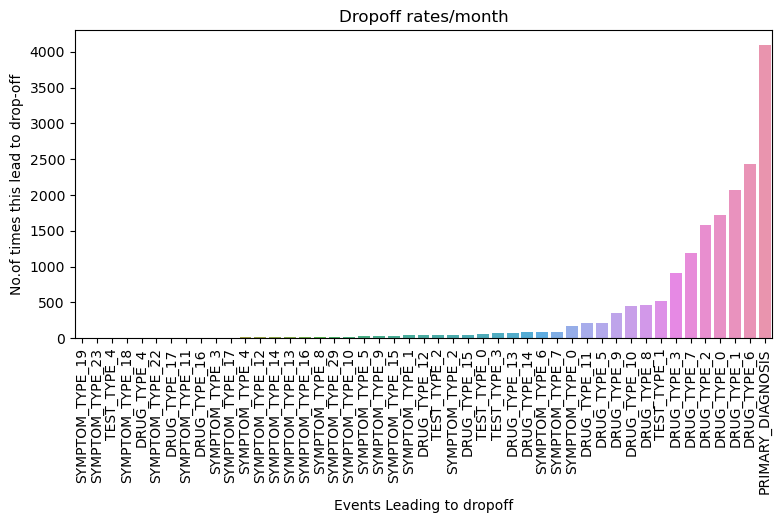

In [39]:
plt.figure(figsize=(9, 4))
sns.barplot(data=df_freq, x='Events', y='Dropping-off rates')
plt.title("Dropoff rates/month")
plt.xlabel('Events Leading to dropoff')
plt.ylabel('No.of times this lead to drop-off')
plt.xticks(rotation=90)
plt.show()